# NBA Player Efficiency Analysis Code
## Predicting Player Efficiency Rating (PER)
### Author: Millie Cox
#### Date: 12/07/2023

In the realm of NBA basketball, where only five players grace the court for each team simultaneously, the strategic deployment of top-performing athletes is paramount. The quest to more accurately gauge player performance on this elite stage has proven to be a persistent challenge. A notable advancement in this pursuit is the introduction of Player Efficiency Rating (PER), an advanced metric designed to transcend traditional box score statistics. PER strives to unveil the true elements that contribute to a player's value within a team context. My goal is to develop a predictive model for a player's PER rating based on their season-long statistics. Additionally, I aim to discern the specific statistical factors that wield the most influence in forecasting a player's efficiency on the court.

## Background / Motivation

Evaluating the skill level of a basketball player proves to be a complex task due to the multifaceted nature of the sport. Distinguishing between players becomes challenging as two individuals may possess identical statistics yet exhibit vastly different playing styles. In contrast to sports like football or baseball, where success metrics are more straightforward, quantifying success on the basketball court is a nuanced endeavor. For example, comparing a player scoring 30 points per game on 40% shooting with another scoring 20 points per game on 50% shooting lacks a definitive answer to determine the superior player. This ambiguity is where Player Efficiency Rating (PER) becomes invaluable. Serving as an advanced metric, PER endeavors to gauge a player's efficiency on both offense and defense during their on-court engagements. My objective has been to predict PER by leveraging a player's box score statistics and other pertinent metrics.

## Problem statement 

There is a common debate in the NBA about what makes a player valuable on offense to the team. I aim to use Player Efficiency Rating (PER) to determine how effective a player is during their time in the game. Assuming this is an accurate measure of a player’s contribution to the game, I hope to look beyond the box score and uncover what attributes truly make a player ‘efficient’.

## Data sources

I used NBA player data dating back to 1950 from [Kaggle](https://www.kaggle.com/code/piyush1912/nba-top-players-deep-learning/input?select=Seasons_Stats.csv). This dataset gives in depth statistics about players from any year, which helps in determining the variables that are associated with strong PER. Each row represents a season for a player, and the data has 24,700 rows total. Each column represents a different statistic, with 53 columns total. I will use some years to train the model and some as the test dataset. It's important to note that PER as a metric was not adopted until 1952.

## Stakeholders

If PER is truly a reasonable metric to gauge player performance, I will be able to see which factors of a player’s game are most associated their performance on the court and use these to predict a player’s PER given their in-game statistics. This will be valuable to coaches and scouts who can look for desirable attributes in their players and could help make game time decisions and recruit future prospects. Most importantly, a player looking to improve their game will be able to focus on factors most associated with increased player performance. This will both make them more appealing to coaches who are aware of advanced analytics and help them become more efficient on the court. It is worth noting that PER is purely an individual statistic, so it does not account for interactions with other players and team environments. Therefore, simply amassing a group of players that have the traits of high PER players could have adverse effects on the team as a whole, and I was unable to take this limitation into account due to the scope of this project.

## Data Cleaning, Preparation, and Evaluation


### Data Check

Before starting on the data cleaning process, a preliminary data check involves importing essential libraries and exploring a snapshot of the dataset's summary statistics. Armed with pandas, numpy, seaborn, and matplotlib, we set the stage for a thorough examination.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import make_scorer, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from pyearth import Earth
import xgboost as xgb
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from xgboost.sklearn import XGBRegressor
from fitter import Fitter, get_common_distributions, get_distributions
import itertools as it

# Hiding warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading data
data = pd.read_csv('Seasons_Stats.csv')

In [4]:
# Summary statistics of continuous variables
data.describe()

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24691.000000,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,...,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
mean,12345.000000,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,...,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,7127.822084,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,...,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,0.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6172.500000,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,...,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,12345.000000,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,...,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,18517.500000,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,...,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000
max,24690.000000,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000


This preliminary exploration provides an overview of the dataset, laying the groundwork for subsequent actions.

### Table Describing Each Variable

To gain a comprehensive understanding of the dataset's composition, a detailed table describing each variable is constructed. This table showcases the types of variables, the count of missing values, and the number of unique values for both categorical and continuous variables.

In [5]:
# Table describing each variable
table_rows = []
for var in data.columns:
    # Check if the variable is categorical or continuous
    if data[var].dtype == 'object':
        missing_values = data[var].isnull().sum()
        unique_values = data[var].nunique()
        table_rows.append([var, 'Categorical',
                           missing_values, unique_values])
    else:
        # If continuous, calculate the summary statistics
        desc = data[var].describe()
        missing_values = data[var].isnull().sum()
        unique_values = '-'
        table_rows.append([var, 'Continuous',
                           missing_values, unique_values])

# Create a DataFrame from the table rows
table_df = pd.DataFrame(table_rows, columns=['Variable',
                                             'Type',
                                             'Missing Values',
                                             'Unique Values'])

# Print the table
table_df

,Variable,Type,Missing Values,Unique Values
0,Unnamed: 0,Continuous,0,-
1,Year,Continuous,67,-
2,Player,Categorical,67,3921
3,Pos,Categorical,67,23
4,Age,Continuous,75,-
5,Tm,Categorical,67,69
6,G,Continuous,67,-
7,GS,Continuous,6458,-
8,MP,Continuous,553,-
9,PER,Continuous,590,-


This comprehensive table equips us with insights into the nature and characteristics of each variable, guiding subsequent cleaning and preparation steps.

### Data Cleaning/Preparation

Armed with insights from the data check and variable table, we'll begin data cleaning and preparation. Key steps in this process include:

**Eliminating Meaningless/Irrelevant Columns**

Columns deemed meaningless (blanl, blank2, Unnamed: 0) or irrelevant to player statistics (Year, Player, Tm) are systematically removed to streamline the dataset.

**Converting Categorical Variables to Dummy Variables**

The sole remaining categorical variable (Pos) undergoes transformation into dummy variables, enhancing its compatibility with subsequent analysis.

**Dropping Variables Affected by Game Performance**

Variables susceptible to game performance influence (G, GS, MP) are strategically dropped to ensure model robustness.

**Train-Test Split**

Finally, the dataset is partitioned into an 80-20 train-test split, setting the stage for modeling.

In [6]:
# Dropping meaningless/irrelevant columns
data = data.drop(['Year', 'Player', 'Tm', 'blanl', 'blank2', 'Unnamed: 0'], axis = 1)

# Converting categorical variables to dummy variables, then dropping NAs
data = pd.get_dummies(data)
data = data.dropna()

# Splitting response and predictors
y = data.PER
X = data.drop('PER', axis = 1)

# Dropping variables that will be affected by game performance
X = X.drop(['G','GS','MP'], axis = 1)

# 80/20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

This systematic approach ensures a refined and robust dataset, laying the foundation for subsequent modeling and analysis. Stay tuned for further insights into predicting Player Efficiency Rating (PER) and unraveling the intricate dynamics of NBA player performance.

## Exploratory data analysis

### Distribution of Response

The response variable, Player Efficiency Rating (PER), exhibits an approximately normal distribution. With a mean of 13.2 and a standard deviation of 4.7, PER captures a diverse range of player performances on the NBA court.

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.002314,2126.831693,2142.007191,inf,0.037881,1.276353e-18


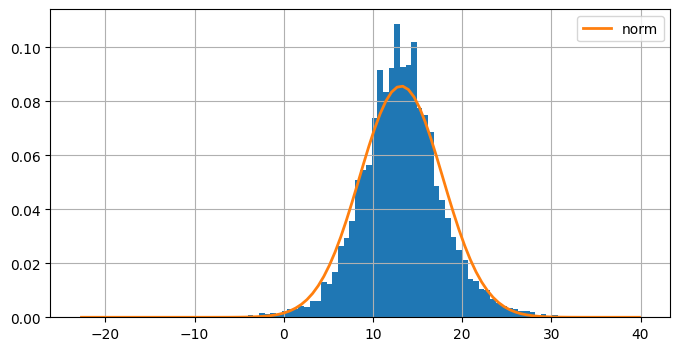

In [7]:
# Distribution of response variable plot
plt.figure(figsize = (8,4))
plt.hist(y, bins = 100)

plt.title('Distribution of PER')
plt.xlabel('PER (%)')
plt.ylabel('Density')

f = Fitter(y, distributions = ['norm'])
f.fit()
f.summary()

Further delving into the distribution, statistical fitting unveils that the normal distribution best encapsulates the nuances of PER, as indicated by the minimum sum of squared errors. The optimal normal distribution parameters reveal a central tendency at approximately 13.16 with a spread captured by a standard deviation of 4.66.

In [8]:
# Mean and SD of response
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 13.158210490229688, 'scale': 4.655538680335473}}

### Correlations

A correlation matrix illuminates the relationships between variables, with a focus on their connections with PER. Positive correlations dominate, highlighting variables that align with and influence player efficiency. Key insights emerge, showcasing negative correlations with turnover percentage (TOV%) and three-point attempt rate (3PAr), indicating that these aspects may hinder overall player efficiency. On the flip side, strong positive correlations are observed with metrics such as Win Shares per 48 minutes (WS/48), Offensive Box Plus/Minus (OBPM), and Box Plus/Minus (BPM), underscoring the influence of these performance-oriented variables on PER.

In [9]:
corrs = pd.DataFrame(columns = ['Correlation'])
corrs['Correlation'] = data[data.columns[1:]].corrwith(data['PER'])
corrs.sort_values(by = 'Correlation', ascending = True).dropna().head(6)

,Correlation
TOV%,-0.279166
3PAr,-0.179803
Pos_SG,-0.083108
Pos_SF,-0.034578
Pos_SG-SF,-0.026329
Pos_PF-SF,-0.016967


In [10]:
corrs.sort_values(by = 'Correlation', ascending = False).dropna().head(6)

,Correlation
PER,1.000000
WS/48,0.851878
OBPM,0.848397
BPM,0.805268
WS,0.734911
OWS,0.727150


## Developing the model: Hyperparameter tuning

### Base Models

#### Multivariate Adaptive Regression Splines (MARS)

**Optimal MARS Model**

The optimal MARS model showcases a degree of 3, achieving a test Mean Absolute Error (MAE) of 0.4209. Notably, Box Plus/Minus, Usage Percentage, Win Shares Per 48 Minutes, Defensive Box Plus/Minus, and Block Percentage emerge as the top predictors significantly influencing outcomes. The final MARS model with the optimal degree of 3 unfolds its structure, revealing basis functions and coefficients intricately linked to predictor variables.

In [ ]:
# Tuning MARS degree
mae_iter = pd.DataFrame(columns = ['degree' , 'MAE']) 
iter_number = 0
for d in range (1, 5):
    model = Earth(max_terms = 500, max_degree = d)
    model.fit(X_train,y_train)
    mae = cross_validate(model, X_train, y_train, cv = 5,
                         scoring = 'neg_mean_absolute_error')['test_score'].mean()
    mae_iter.loc[iter_number,'degree'] = d
    mae_iter.loc[iter_number,'MAE'] = mae
    iter_number += 1
mae_iter.sort_values(by = 'MAE', ascending = False).iloc[0,:]

degree           3
MAE      -0.440828
Name: 2, dtype: object

In [ ]:
# Final MARS model with optimal degree
mars_model = Earth(max_terms = 500, max_degree = 3,
                   feature_importance_type = 'rss')
mars_model.fit(X_train, y_train)

print(mars_model.summary())

Earth Model
---------------------------------------------------
Basis Function               Pruned  Coefficient   
---------------------------------------------------
(Intercept)                  No      15.6303       
h(WS/48+0.263)               No      24.3088       
h(-0.263-WS/48)              No      -29.7018      
h(USG%-39.9)                 No      0.905595      
h(39.9-USG%)                 No      -0.402891     
h(BPM-10.1)                  No      -0.548927     
h(10.1-BPM)                  No      -0.332364     
FG%                          No      7.70568       
AST%*h(39.9-USG%)            No      0.00545405    
h(TRB%-24.5)*FG%             No      0.681198      
h(24.5-TRB%)*FG%             No      -0.469773     
h(DBPM-5.6)*h(WS/48+0.263)   No      -1.33274      
h(5.6-DBPM)*h(WS/48+0.263)   No      1.67235       
BLK%*h(WS/48+0.263)          No      1.73498       
h(STL%-6.5)*h(WS/48+0.263)   No      2.35249       
h(6.5-STL%)*h(WS/48+0.263)   No      -2.30475      


In [ ]:
# MARS test MAE
mars_pred = mars_model.predict(X_test)
print('Test MAE: ', mean_absolute_error(mars_pred, y_test))

Test MAE:  0.42089758429537827


In [ ]:
# MARS feature importances
feat_imp = pd.DataFrame(columns = ['predictor', 'importance'])
imps = mars_model.feature_importances_

feat_imp.loc[:,'predictor'] = X.columns
feat_imp.loc[:,'importance'] = imps

feat_imp.sort_values(by = 'importance', ascending = False).reset_index(drop = True).head()

,predictor,importance
0,BPM,0.565432
1,USG%,0.168296
2,WS/48,0.105595
3,DBPM,0.042832
4,BLK%,0.041101


#### Decision Tree

**Optimal Decision Tree Model**

The optimal decision tree model, with a max_depth of 13 and max_leaf_nodes of 620, attains a test MAE of 1.1376. Influential predictors include Offensive Box Plus/Minus, Win Shares Per 48 Minutes, Usage Percentage, 3-Point Attempt Rate, and True Shooting Percentage.

In [ ]:
# Decision tree coarse grid search
dt = DecisionTreeRegressor(random_state = 1)

parameters = {'max_depth': range(9, 15),
              'max_leaf_nodes': range(200, 800, 5)}

cv = KFold(n_splits = 5, shuffle = True, random_state = 1)

model = GridSearchCV(dt, parameters, n_jobs = -1, verbose = 1, cv = cv,
                     scoring = ['neg_mean_absolute_error', 'r2'],
                     refit = 'neg_mean_absolute_error')
model.fit(X_train, y_train)

print(model.best_score_, model.best_params_) 

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
-1.12918877133901 {'max_depth': 13, 'max_leaf_nodes': 620}


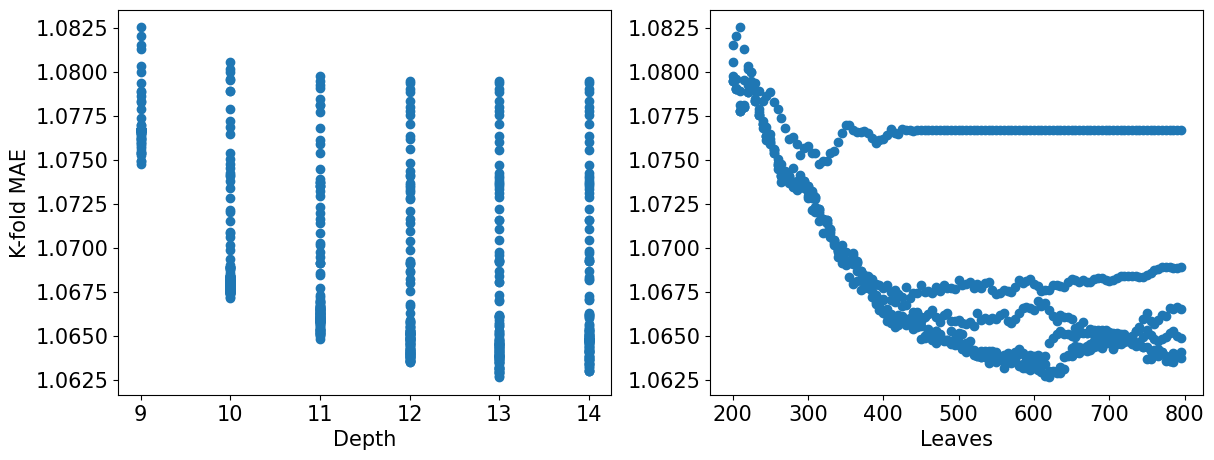

In [ ]:
# Visualizing decision tree coarse grid serch
cv_results = pd.DataFrame(model.cv_results_)

fig, axes = plt.subplots(1, 2, figsize = (14, 5))
plt.subplots_adjust(wspace = 0.2)

axes[0].plot(cv_results.param_max_depth, np.sqrt(-cv_results.mean_test_neg_mean_absolute_error), 'o')
axes[0].set_xlabel('Depth')
axes[0].set_ylabel('K-fold MAE')

axes[1].plot(cv_results.param_max_leaf_nodes, np.sqrt(-cv_results.mean_test_neg_mean_absolute_error), 'o')
axes[1].set_xlabel('Leaves');

In [ ]:
# Decision tree fine grid search
dt = DecisionTreeRegressor(random_state = 1)

parameters = {'max_depth': range(11, 18),
              'max_leaf_nodes': range(600, 650, 5)}

cv = KFold(n_splits = 5, shuffle = True, random_state = 1)

model = GridSearchCV(dt, parameters, n_jobs = -1, verbose = 1, cv = cv,
                     scoring = ['neg_mean_absolute_error', 'r2'],
                     refit = 'neg_mean_absolute_error')
model.fit(X_train, y_train)

print(model.best_score_, model.best_params_) 

Fitting 5 folds for each of 70 candidates, totalling 350 fits
-1.12918877133901 {'max_depth': 13, 'max_leaf_nodes': 620}


In [ ]:
# Final decision tree model with optimal parameters
dt_model = DecisionTreeRegressor(random_state = 1, max_depth = 13,
                                 max_leaf_nodes = 620) 
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=13, max_leaf_nodes=620, random_state=1)

In [ ]:
# Decision tree test MAE
dt_pred = dt_model.predict(X_test)
print('Test MAE: ', mean_absolute_error(dt_pred, y_test))

Test MAE:  1.1375654328460785


In [ ]:
# Decision tree feature importances
feat_imp = pd.DataFrame(columns = ['predictor', 'importance'])
imps = dt_model.feature_importances_

feat_imp.loc[:,'predictor'] = X.columns
feat_imp.loc[:,'importance'] = imps

feat_imp.sort_values(by = 'importance', ascending = False).reset_index(drop = True).head()

,predictor,importance
0,OBPM,0.535942
1,WS/48,0.254529
2,USG%,0.125603
3,3PAr,0.009948
4,TS%,0.009651


### Random Forest

**Optimal Random Forest Model**

The optimal random forest model, characterized by n_estimators of 199, max_depth of 40, max_leaf_nodes of 2000, and max_features of 40, exhibits a test MAE of 0.7263. Key predictors include Win Shares Per 48 Minutes, Offensive Box Plus/Minus, Usage Percentage, Offensive Win Shares, and Box Plus/Minus.

In [12]:
# Visualizing OOB MAE
oob_mae = {}
test_mae = {}

for i in np.linspace(10, 500, 30, dtype = int):
    model = RandomForestRegressor(n_estimators = i, random_state = 1,
                                  max_features = "sqrt", n_jobs = -1,
                                  oob_score = True).fit(X_train, y_train)
    oob_mae[i] = mean_absolute_error(model.oob_prediction_, y_train)
    test_mae[i] = mean_absolute_error(model.predict(X_test), y_test)

plt.rcParams.update({'font.size': 15})
plt.figure(figsize = (8, 6), dpi=80)
plt.plot(oob_mae.keys(), oob_mae.values(), label = 'Out of bag MAE')
plt.plot(oob_mae.keys(), oob_mae.values(), 'o', color = 'blue')
plt.plot(test_mae.keys(), test_mae.values(), label = 'Test data MAE')
plt.xlabel('Number of trees')
plt.ylabel('MAE')
plt.legend()

In [ ]:
# Random forest hyperparameter tuning
params = {'n_estimators': np.linspace(95, 205, 20, dtype = 'int'),
          'max_depth': [40, 50, 60],
          'max_leaf_nodes': [1000, 1500, 2000],
          'max_features': [40, 60, 80]}

param_list = list(it.product(*(params[Name] for Name in params)))

oob_score = [0] * len(param_list)
i = 0
for pr in param_list:
    model = RandomForestRegressor(random_state = 1, oob_score = True,
                                  verbose = False, n_estimators = pr[0],
                                  max_depth = pr[1], max_leaf_nodes = pr[2],
                                  max_features = pr[3],
                                  n_jobs = -1).fit(X_train, y_train)
    oob_score[i] = model.oob_score_
    i = i + 1
    

print("Best params = ", param_list[np.argmax(oob_score)])
print("Best score = ", np.max(oob_score))

Best params =  (199, 40, 2000, 40)
Best score =  0.9547584612812612


In [ ]:
# Final random forest model with optimal parameters
rf_model = RandomForestRegressor(n_estimators = 199, random_state = 1,
                                 max_leaf_nodes = 2000, max_depth = 40,
                                 oob_score = True, n_jobs=-1,
                                 max_features = 40)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, max_features=40, max_leaf_nodes=2000,
                      n_estimators=199, n_jobs=-1, oob_score=True,
                      random_state=1)

In [ ]:
# Random forest test MAE
rf_pred = rf_model.predict(X_test)
print('MAE: ', mean_absolute_error(rf_pred, y_test))

MAE:  0.7262912174920435


In [ ]:
# Random forest feature importances
feat_imp = pd.DataFrame(columns = ['predictor', 'importance'])
imps = rf_model.feature_importances_

feat_imp.loc[:,'predictor'] = X.columns
feat_imp.loc[:,'importance'] = imps

feat_imp.sort_values(by = 'importance', ascending = False).reset_index(drop = True).head()

,predictor,importance
0,WS/48,0.330777
1,OBPM,0.295105
2,USG%,0.118119
3,OWS,0.048091
4,BPM,0.044103


### Bagged Trees

**Optimal Bagged Tree Model**

The optimal bagged tree model, configured with n_estimators of 1200, max_samples of 0.8, max_features of 0.8, without bootstrapping, and excluding bootstrap features, yields a test MAE of 0.6934. Top predictors include Offensive Box Plus/Minus, Win Shares Per 48 Minutes, Usage Percentage, Box Plus/Minus, and Offensive Win Shares.

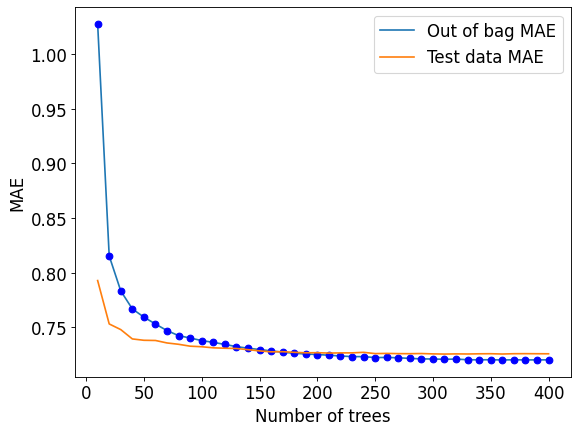

In [ ]:
# Visualizing OOB MAE
oob_mae = {}
test_mae = {}

for i in np.linspace(10, 400, 40, dtype=int):
    model = BaggingRegressor(base_estimator = DecisionTreeRegressor(),
                             n_estimators = i, random_state = 1, n_jobs = -1,
                             oob_score = True).fit(X_train, y_train)
    oob_mae[i] = mean_absolute_error(model.oob_prediction_, y_train)
    test_mae[i] = mean_absolute_error(model.predict(X_test), y_test)

plt.rcParams.update({'font.size': 15})
plt.figure(figsize = (8, 6), dpi = 80)
plt.plot(oob_mae.keys(), oob_mae.values(), label = 'Out of bag MAE')
plt.plot(oob_mae.keys(), oob_mae.values(), 'o', color = 'blue')
plt.plot(test_mae.keys(), test_mae.values(), label = 'Test data MAE')
plt.xlabel('Number of trees')
plt.ylabel('MAE')
plt.legend()

In [ ]:
# Bagged trees coarse grid search
br = BaggingRegressor(base_estimator = DecisionTreeRegressor(),
                      random_state = 1, n_jobs=-1)

params = {'n_estimators': [200, 350, 500],
          'max_samples': [0.5, 0.7, 1.0],
          'max_features': [0.5, 0.7, 1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]
         }

cv = KFold(n_splits = 5, shuffle = True, random_state = 1)

bagreg_grid = GridSearchCV(br, params, n_jobs = -1, verbose = 1,
                           cv = cv, scoring = 'neg_mean_absolute_error')
bagreg_grid.fit(X_train, y_train)

print('Test MAE Score : %.3f'%bagreg_grid.best_estimator_.score(X_test, y_test))
print('Best MAE Score Through Grid Search : %.3f'%bagreg_grid.best_score_)
print('Best Parameters : ',bagreg_grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Test MAE Score : 0.960
Best MAE Score Through Grid Search : -0.715
Best Parameters :  {'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 500}


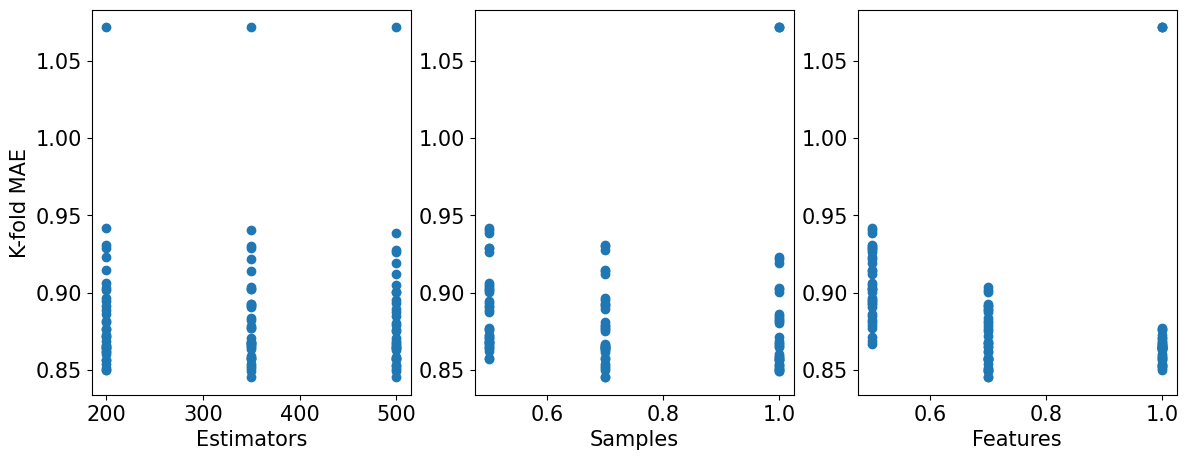

In [ ]:
# Visualizing the bagged trees coarse grid search
cv_results = pd.DataFrame(bagreg_grid.cv_results_)

fig, axes = plt.subplots(1, 3, figsize = (14, 5))
plt.subplots_adjust(wspace = 0.2)

axes[0].plot(cv_results.param_n_estimators, np.sqrt(-cv_results.mean_test_score), 'o')
axes[0].set_xlabel('Estimators')
axes[0].set_ylabel('K-fold MAE')

axes[1].plot(cv_results.param_max_samples, np.sqrt(-cv_results.mean_test_score), 'o')
axes[1].set_xlabel('Samples')

axes[2].plot(cv_results.param_max_features, np.sqrt(-cv_results.mean_test_score), 'o')
axes[2].set_xlabel('Features');

In [ ]:
# Bagged trees fine grid search
br = BaggingRegressor(base_estimator = DecisionTreeRegressor(),
                      random_state = 1, n_jobs=-1)

params = {'n_estimators': [500, 600, 700],
          'max_samples': [0.6, 0.7, 0.8],
          'max_features': [0.6, 0.7, 0.8],
          'bootstrap': [False],
          'bootstrap_features': [False]
         }

cv = KFold(n_splits = 5, shuffle = True, random_state = 1)

bagreg_grid = GridSearchCV(br, params, n_jobs = -1, verbose = 1,
                           cv = cv, scoring = 'neg_mean_absolute_error')
bagreg_grid.fit(X_train, y_train)

print('Test MAE Score : %.3f'%bagreg_grid.best_estimator_.score(X_test, y_test))
print('Best MAE Score Through Grid Search : %.3f'%bagreg_grid.best_score_)
print('Best Parameters : ', bagreg_grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Test MAE Score : 0.961
Best MAE Score Through Grid Search : -0.704
Best Parameters :  {'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 500}


In [ ]:
# Final bagging model with optimal parameters (some manual adjustments)
br_model = BaggingRegressor(base_estimator = DecisionTreeRegressor(random_state = 1),
                            n_estimators = 1200, random_state = 1,
                            n_jobs = -1, bootstrap = False,
                            max_features = 0.8, max_samples = 0.8,
                            bootstrap_features = False)
br_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=1),
                 bootstrap=False, max_features=0.8, max_samples=0.8,
                 n_estimators=1200, n_jobs=-1, random_state=1)

In [ ]:
# Bagged trees test MAE
br_pred = br_model.predict(X_test)
print('MAE: ', mean_absolute_error(br_pred, y_test))

MAE:  0.6933755856473546


In [91]:
# Bagged trees feature importances
feat_imp = pd.DataFrame(columns = ['predictor', 'importance'])

total = [0] * 65
for i, temp_model in enumerate(br_model.estimators_):
    feat = br_model.estimators_features_[i]
    for j, pred in enumerate(feat):
        total[pred] += temp_model.feature_importances_[j]
imps = np.array(total) / len(br_model.estimators_)

feat_imp.loc[:, 'predictor'] = br_model.feature_names_in_
feat_imp.loc[:,'importance'] = imps

feat_imp.sort_values(by = 'importance', ascending = False).head()

,predictor,importance
16,OBPM,0.368334
15,WS/48,0.336582
11,USG%,0.106954
18,BPM,0.021084
12,OWS,0.017468


### XGBoost

**Optimal XGBoost Model**

The optimal XGBoost model, with subsample of 0.5, reg_lambda of 0.1, n_estimators of 3000, max_depth of 5, learning_rate of 0.01, and gamma of 4, outshines others with a test MAE of 0.4065. Prominent predictors encompass Offensive Box Plus/Minus, Win Shares Per 48 Minutes, Box Plus/Minus, Usage Percentage, and Win Shares.

In [94]:
# XGBoost coarse randomized search
xgb = XGBRegressor()

params = {'max_depth': range(1, 15),
          'n_estimators': [100, 500, 1000, 5000],
          'learning_rate': [0.001, 0.01, 0.1, 1],
          'subsample': [0.25, 0.5, 0.75, 1],
          'gamma': range(1, 10),
          'reg_lambda': [0.1, 0.5, 1, 5, 10]}

cv = KFold(n_splits = 3, shuffle = True, random_state = 1)

grid = RandomizedSearchCV(xgb, params, cv = cv, verbose = 1, n_jobs = -1,
                          scoring = 'neg_mean_absolute_error')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
-0.3593182796554393
{'subsample': 0.5, 'reg_lambda': 0.1, 'n_estimators': 5000, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 1}


In [97]:
# XGBoost fine randomized search
xgb = XGBRegressor()

params = {'max_depth': range(2, 12, 3),
          'n_estimators': [2000, 2500, 3000],
          'learning_rate': [0.01],
          'subsample': [0.5],
          'gamma': range(1, 9),
          'reg_lambda': [0.1, 0.5, 1]}

cv = KFold(n_splits = 3, shuffle = True, random_state = 1)

grid = RandomizedSearchCV(xgb, params, cv = cv, verbose = 1, n_jobs = -1,
                          scoring = 'neg_mean_absolute_error')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
-0.43621912660683454
{'subsample': 0.5, 'reg_lambda': 0.1, 'n_estimators': 3000, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 4}


In [98]:
# Final XGBoost model with optimal parameters
xgb_model = XGBRegressor(subsample = 0.5, reg_lambda = 0.1,
                         n_estimators = 3000, max_depth = 5,
                         learning_rate = 0.01, gamma = 4, random_state = 1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=4, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=3000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [99]:
# XGBoost test MAE
xgb_pred = xgb_model.predict(X_test)
print('MAE: ', mean_absolute_error(xgb_pred, y_test))

MAE:  0.40654860944217375


In [103]:
# XGBoost feature importance
feat_imp = pd.DataFrame(columns = ['predictor', 'importance'])
imps = xgb_model.feature_importances_

feat_imp.loc[:,'predictor'] = X.columns
feat_imp.loc[:,'importance'] = imps

feat_imp.sort_values(by = 'importance', ascending = False).reset_index(drop = True).head()

,predictor,importance
0,OBPM,0.295606
1,WS/48,0.266708
2,BPM,0.066346
3,USG%,0.059370
4,WS,0.032284


## Model Ensemble 

### Voting ensemble

Now we will assemble our tuned models into powerful ensembles and witness the symphony of predictions.

Voting Ensemble Reprise
The voting ensemble, comprising XGBoost, MARS, Decision Tree, Random Forest, and Bagged Trees, orchestrates a test MAE of 0.5821. It gracefully blends the diverse predictions of its members.

In [104]:
# Voting ensemble
ve = VotingRegressor(estimators=[('xgb', xgb_model), ('mars', mars_model),
                                 ('dt', dt_model),('rf', rf_model),
                                 ('br', br_model)])
ve.fit(X_train, y_train)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=4, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0....
                             DecisionTreeRegressor(max_depth=13,
                                                   max_leaf_nodes=620,
                                                   random_state=1)),
                            ('rf',
                             RandomForestRegressor(max_depth=40,
                                                   max_features=40,
                                                   max_leaf_nodes=2000,
                                                   n_estimators=199, n_jobs=-1,
                                                   oob_score=True,
                                                   random_state=1)),
                            ('br',
                             BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=1),
                                              bootstrap=False, max_features=0.8,
                                              max_samples=0.8,
                                              n_estimators=1200, n_jobs=-1,
                                              random_state=1))])

In [105]:
# Voting ensemble test MAE
ve_preds = ve.predict(X_test)
print('MAE: ', mean_absolute_error(ve_preds, y_test))

MAE:  0.5820726171145701


### Stacking Ensembles

Our stacking ensembles, each with its distinctive metamodel, unveil their prowess. The bagged tree metamodel achieves a test MAE of 0.3804, the XGBoost metamodel boasts a MAE of 0.3736, while the MARS metamodel takes the lead with the lowest test MAE of 0.3496.

**Stacking Ensemble with Bagged Tree Final Estimator:**

In [111]:
# Stacking ensemble with bagged final estimator
cv = KFold(n_splits = 5, shuffle = True, random_state = 1)

br_en = StackingRegressor(estimators = [('xgb', xgb_model),
                                        ('mars', mars_model),
                                        ('dt', dt_model),
                                        ('rf', rf_model),
                                        ('br', br_model)],
                            final_estimator = BaggingRegressor(base_estimator = DecisionTreeRegressor(),
                                                               random_state = 1,
                                                               n_jobs=-1),
                            cv = cv)
br_en.fit(X_train, y_train)

StackingRegressor(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=4,
                                            gpu_id=None, grow_policy=None,
                                            importance_type...
                                                     max_features=40,
                                                     max_leaf_nodes=2000,
                                                     n_estimators=199,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=1)),
                              ('br',
                               BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=1),
                                                bootstrap=False,
                                                max_features=0.8,
                                                max_samples=0.8,
                                                n_estimators=1200, n_jobs=-1,
                                                random_state=1))],
                  final_estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                                   n_jobs=-1, random_state=1))

In [112]:
# Bagged stacking ensemble test MAE
br_en_preds = br_en.predict(X_test)
print('MAE: ', mean_absolute_error(br_en_preds, y_test))

MAE:  0.3804250942749399


**Stacking Ensemble with XGBoost Final Estimator:**

In [113]:
# Stacking ensemble with XGBoost final estimator
cv = KFold(n_splits = 5, shuffle = True, random_state = 1)

xgb_en = StackingRegressor(estimators = [('xgb', xgb_model),
                                         ('mars', mars_model),
                                         ('dt', dt_model),
                                         ('rf', rf_model),
                                         ('br', br_model)],
                            final_estimator = XGBRegressor(random_state = 1),
                            cv = cv)
xgb_en.fit(X_train, y_train)

StackingRegressor(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=4,
                                            gpu_id=None, grow_policy=None,
                                            importance_type...
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               predictor=None, random_state=1, ...))

In [114]:
# XGBoost stacking ensemble test MAE
xgb_en_preds = xgb_en.predict(X_test)
print('MAE: ', mean_absolute_error(xgb_en_preds, y_test))

MAE:  0.3736327594208072


**Stacking Ensemble with MARS Final Estimator**

In [109]:
# Stacking ensemble with MARS final estimator
cv = KFold(n_splits = 5, shuffle = True, random_state = 1)

mars_en = StackingRegressor(estimators = [('xgb', xgb_model),
                                          ('mars', mars_model),
                                          ('dt', dt_model),
                                          ('rf', rf_model),
                                          ('br', br_model)],
                            final_estimator = Earth(max_degree = 3, 
                                                    feature_importance_type = 'rss'),
                            cv = cv)
mars_en.fit(X_train, y_train)

StackingRegressor(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=4,
                                            gpu_id=None, grow_policy=None,
                                            importance_type...
                               RandomForestRegressor(max_depth=40,
                                                     max_features=40,
                                                     max_leaf_nodes=2000,
                                                     n_estimators=199,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=1)),
                              ('br',
                               BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=1),
                                                bootstrap=False,
                                                max_features=0.8,
                                                max_samples=0.8,
                                                n_estimators=1200, n_jobs=-1,
                                                random_state=1))],
                  final_estimator=Earth(feature_importance_type='rss',
                                        max_degree=3))

In [110]:
# MARS stacking ensemble test MAE
mars_en_preds = mars_en.predict(X_test)
print('MAE: ', mean_absolute_error(mars_en_preds, y_test))

MAE:  0.34955098230095305


In [131]:
# Feature importances for each individual model in MARS stacking ensemble
xgb_feat_imp = pd.DataFrame(columns = ['predictor', 'importance'])
mars_feat_imp = pd.DataFrame(columns = ['predictor', 'importance'])
dt_feat_imp = pd.DataFrame(columns = ['predictor', 'importance'])
rf_feat_imp = pd.DataFrame(columns = ['predictor', 'importance'])
br_feat_imp = pd.DataFrame(columns = ['predictor', 'importance'])

xgb_imps = mars_en.estimators_[0].feature_importances_
mars_imps = mars_en.estimators_[1].feature_importances_
dt_imps = mars_en.estimators_[2].feature_importances_
rf_imps = mars_en.estimators_[3].feature_importances_

total = [0] * 65
for i, temp_model in enumerate(mars_en.estimators_[4].estimators_):
    feat = mars_en.estimators_[4].estimators_features_[i]
    for j, pred in enumerate(feat):
        total[pred] += temp_model.feature_importances_[j]
br_imps = np.array(total) / len(mars_en.estimators_[4].estimators_)

xgb_feat_imp.loc[:,'predictor'] = X.columns
xgb_feat_imp.loc[:,'importance'] = xgb_imps

mars_feat_imp.loc[:,'predictor'] = X.columns
mars_feat_imp.loc[:,'importance'] = mars_imps

dt_feat_imp.loc[:,'predictor'] = X.columns
dt_feat_imp.loc[:,'importance'] = dt_imps

rf_feat_imp.loc[:,'predictor'] = X.columns
rf_feat_imp.loc[:,'importance'] = rf_imps

br_feat_imp.loc[:,'predictor'] = X.columns
br_feat_imp.loc[:,'importance'] = br_imps


In [133]:
# Weights of each individual model in MARS stacking ensemble
feat_imp = pd.DataFrame(columns = ['predictor', 'importance'])
imps = mars_en.final_estimator_.feature_importances_

In [137]:
# Scaling importances of each model by weight
xgb_feat_imp['importance'] = xgb_feat_imp['importance'].apply(lambda x: x * imps[0])
mars_feat_imp['importance'] = mars_feat_imp['importance'].apply(lambda x: x * imps[1])
dt_feat_imp['importance'] = dt_feat_imp['importance'].apply(lambda x: x * imps[2])
rf_feat_imp['importance'] = rf_feat_imp['importance'].apply(lambda x: x * imps[3])
br_feat_imp['importance'] = br_feat_imp['importance'].apply(lambda x: x * imps[4])

### Feature Importance

As a spectacular finale, let's reveal the weighted feature importances from each individual model in the MARS stacking ensemble. The collaboration of models produces a evidence that indivates Offensive Box Plus/Minus, Win Shares Per 48 Minutes, Box Plus/Minus, Usage Percentage, and Win Shares take the center stage.

In [145]:
# Adding weighted feature importances of each model
feat_imp.loc[:,'predictor'] = X.columns
feat_imp.loc[:,'importance'] = xgb_feat_imp['importance'] + mars_feat_imp['importance'] + dt_feat_imp['importance'] + rf_feat_imp['importance'] + br_feat_imp['importance']

feat_imp.sort_values(by = 'importance', ascending = False).reset_index(drop = True).head()

,predictor,importance
0,OBPM,0.293376
1,WS/48,0.265573
2,BPM,0.070088
3,USG%,0.060268
4,WS,0.032031


## Conclusions and Recommendations

### Overview of models
<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>


<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Ranking</th>
    <th>Model Type</th>
    <th>Test MAE</th>    
    <th>Most Important Features</th>
  </tr>
  <tr>
    <td>1</td>
    <td>Stacking ensemble w/ MARS metamodel</td>
    <td>0.3496</td>    
    <td>OBPM, WS/48, BPM, USG%, WS</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Stacking ensemble w/ XGBoost metamodel</td>
    <td>0.3736</td>    
    <td>Did not calculate</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Stacking ensemble w/ bagged tree metamodel</td>
    <td>0.3804</td>    
    <td>Did not calculate</td>
  </tr>
  <tr>
    <td>4</td>
    <td>XGBoost</td>
    <td>0.4065</td>    
    <td>OBPM, WS/48, BPM, USG%, WS</td> 
  </tr>
  <tr>
    <td>5</td>
    <td>MARS</td>
    <td>0.4209</td>    
    <td>BPM, USG%, WS/48, DBPM, BLK%</td> 
  </tr>
  <tr>
    <td>6</td>
    <td>Voting ensemble</td>
    <td>0.5821</td>    
    <td>Did not calculate</td> 
  </tr>
  <tr>
    <td>7</td>
    <td>Bagged trees</td>
    <td>0.6934</td>    
    <td>OBPM, WS/48, USG%, BPM, OWS</td> 
  </tr>
  <tr>
    <td>8</td>
    <td>Random forest</td>
    <td>0.7263</td>    
    <td>WS/48, OBPM, USG%, OWS, BPM</td> 
  </tr>
  <tr>
    <td>9</td>
    <td>Decision tree</td>
    <td>1.1376</td>    
    <td>OBPM, WS/48, USG%, 3PAr, TS%</td> 
  </tr>
</table>

### Conclusions

- The best model, with a test Mean Absolute Error (MAE) of 0.3496, demonstrates robust predictive capability for Player Efficiency Rating (PER) given the specified predictors, with an error approximately 1/15 of a standard deviation.
- Offensive Box Plus/Minus, Win Shares Per 48 Minutes, Box Plus/Minus, Usage Percentage, and Win Shares emerged as the most critical predictors for PER, with Offensive Box Plus/Minus holding the highest significance.
- Offensive Box Plus/Minus reflects a player's impact on the team's score during their on-court presence. This underscores the notion that offensive performance significantly outweighs defensive contributions in overall player efficiency.
  - In the contemporary league landscape dominated by offensive prowess, players who excel at scoring are highly valued. The emphasis on diverse skillsets for scoring is evident across players of varying profiles.
- The importance of Usage Percentage as a predictor suggests that players who can sustain longer playing times are likely to be more valuable to their teams, contributing to their overall efficiency.

### Recommendations to Stakeholders

- Players are encouraged to enhance their overall shooting proficiency across various facets.
- Coaches and scouts should prioritize recruiting well-rounded shooters over specialists to optimize offensive efficiency.
- The emphasis should be placed on selecting players who exhibit excellent conditioning, allowing them to maximize their on-court involvement.
- Players are advised to prioritize maintaining high-level performance for extended durations, emphasizing the importance of endurance and sustained effectiveness.

### Shortcomings of the Model

- Stakeholders should acknowledge that the model lacks the capability to measure intangibles, recognizing that athlete analysis involves elements beyond the quantifiable variables considered.
- Furthermore, the individual nature of Player Efficiency Rating (PER) means the model cannot capture player-to-player interactions. Exploring the development of a model predicting team efficiency based on individual player statistics could be an intriguing avenue for future research, albeit beyond the current project's scope.